In [ ]:
# Hyperlocal Air Quality Prediction

---

## 1. Project Proposal

### Objective
The goal of this project is to develop an AI model capable of predicting hyperlocal air quality levels based on environmental and temporal features. Hyperlocal air quality prediction focuses on very fine-grained spatial scales (e.g., neighborhood or street level), which is crucial for personalized health advisories and urban planning.

### Motivation
Air pollution is a major public health concern worldwide. Traditional air quality monitoring stations are sparse and often fail to capture local variations in pollution levels. With the rise of low-cost sensors and AI techniques, it is now possible to predict air quality at a hyperlocal scale, enabling better decision-making for individuals and policymakers.

### Approach
- Generate a synthetic dataset simulating hyperlocal air quality measurements with features such as temperature, humidity, wind speed, time of day, and location coordinates.
- Perform exploratory data analysis (EDA) to understand feature relationships.
- Train a regression model (e.g., Random Forest or Gradient Boosting) to predict air quality index (AQI).
- Evaluate model performance and analyze feature importance.

---



In [ ]:

## 2. Brief Literature Review

- **Hyperlocal Air Quality Monitoring:**  
  Recent studies have leveraged dense sensor networks and mobile sensing to capture air pollution at fine spatial resolutions (e.g., Maag et al., 2018). These approaches help identify pollution hotspots that are missed by traditional stations.

- **Machine Learning for AQI Prediction:**  
  Machine learning models such as Random Forests, Support Vector Machines, and Neural Networks have been widely used for air quality prediction (Li et al., 2017). These models can capture nonlinear relationships between environmental factors and pollutant concentrations.

- **Synthetic Data Generation:**  
  When real-world data is limited or privacy-sensitive, synthetic data generation techniques provide a valuable alternative for model development and testing (Frid-Adar et al., 2018). Synthetic datasets can mimic real-world distributions and correlations.

- **Challenges:**  
  Key challenges include handling missing data, sensor noise, and spatial-temporal dependencies. Advanced models like spatiotemporal deep learning architectures are emerging to address these issues.

---


Sample of synthetic air quality data:


,temperature,humidity,wind_speed,hour_of_day,latitude,longitude,AQI
0,14.981605,30.936455,5.719959,0,40.078358,-73.927790,30.828320
1,38.028572,29.758304,8.054323,0,40.092199,-73.982582,43.608372
2,29.279758,82.500366,7.601609,18,40.019505,-73.940977,27.384601
3,23.946339,29.963696,1.538999,4,40.096057,-73.930473,57.309851
4,6.240746,31.755978,1.492495,12,40.014265,-73.965615,49.830899


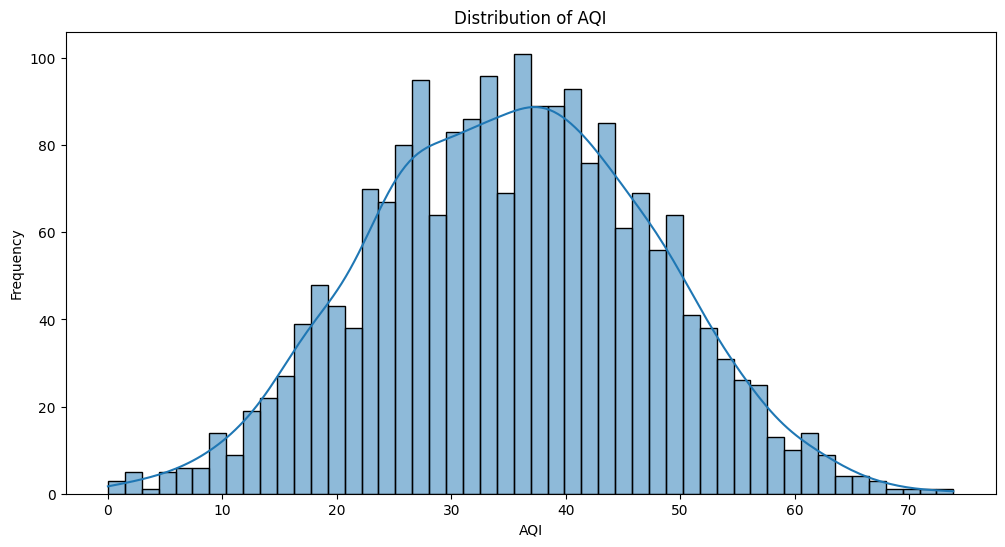

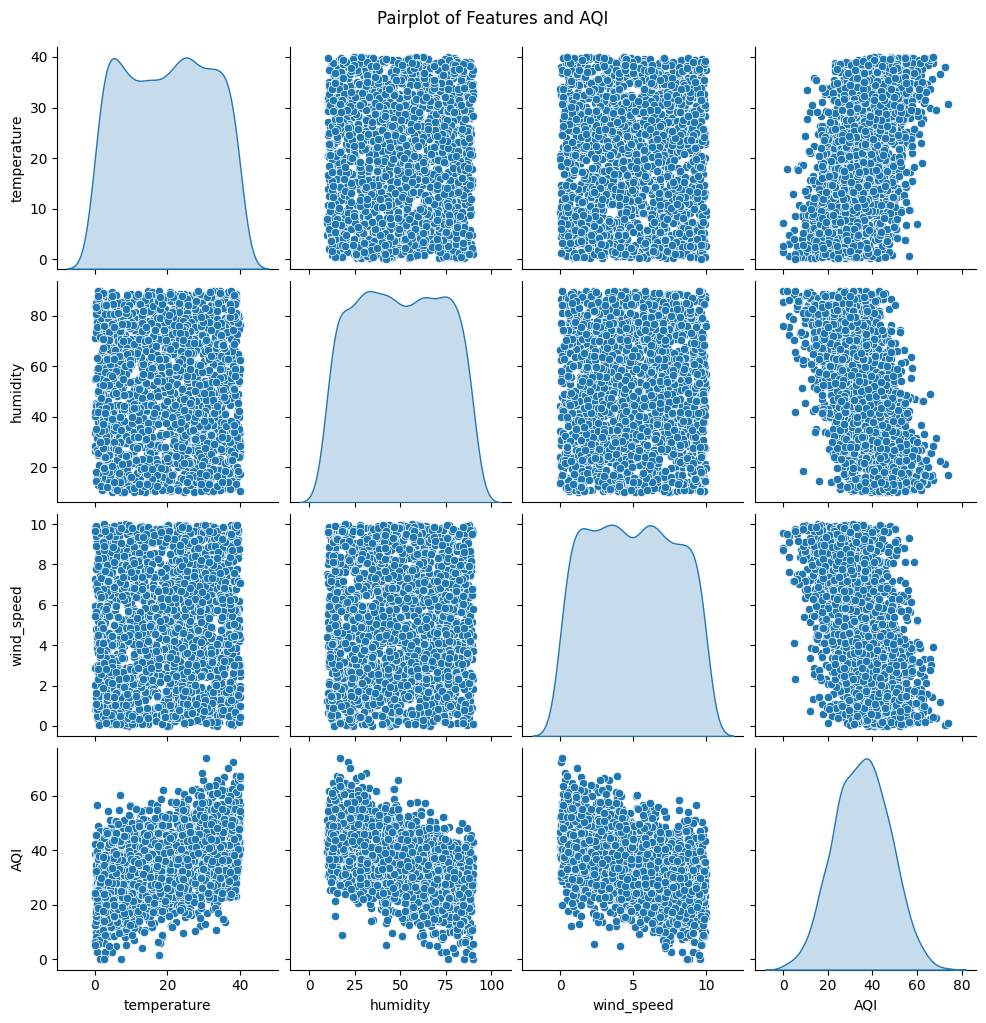

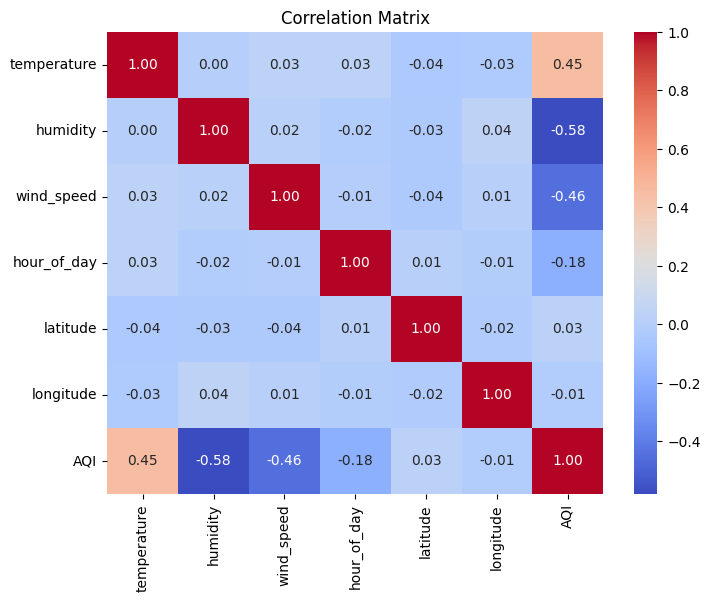

Model Performance on Test Set:
Mean Squared Error (MSE): 32.71
R-squared (R2): 0.78


C:\Users\anany\AppData\Local\Temp\ipykernel_15632\3501345835.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


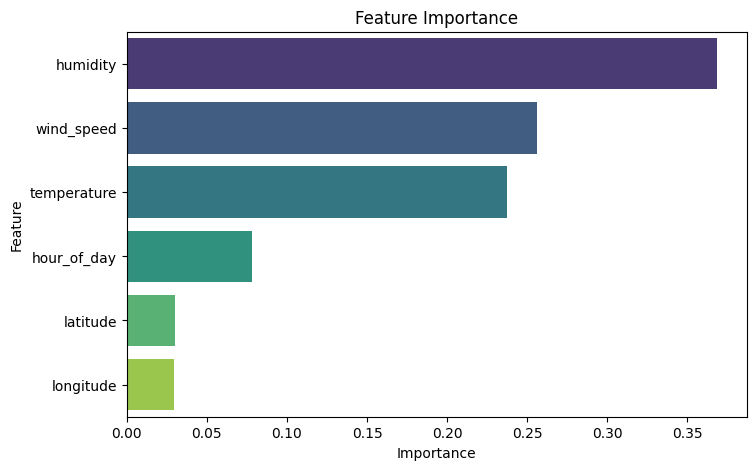

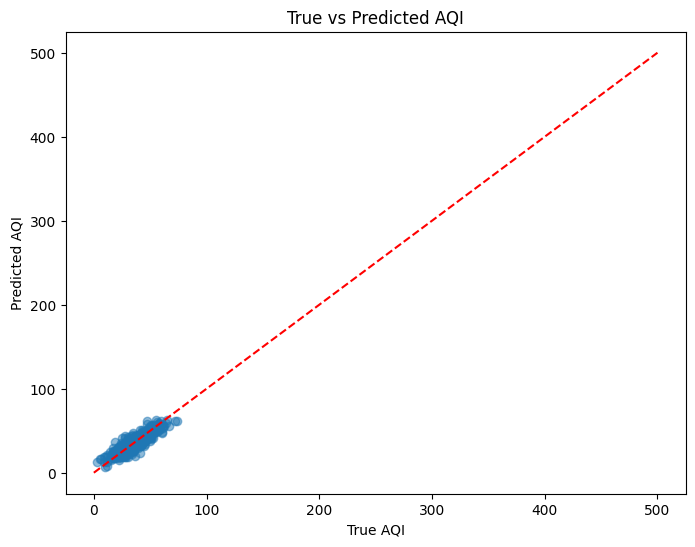

In [1]:
## 3. Python Code: Synthetic Data Generation and Analysis


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
def generate_synthetic_air_quality_data(n_samples=1000):
    """
    Generate a synthetic dataset for hyperlocal air quality prediction.
    
    Features:
    - temperature (°C): 0 to 40
    - humidity (%): 10 to 90
    - wind_speed (m/s): 0 to 10
    - hour_of_day: 0 to 23
    - latitude: 40.0 to 40.1 (small area)
    - longitude: -74.0 to -73.9 (small area)
    
    Target:
    - AQI (Air Quality Index): simulated based on features with noise
    """
    temperature = np.random.uniform(0, 40, n_samples)
    humidity = np.random.uniform(10, 90, n_samples)
    wind_speed = np.random.uniform(0, 10, n_samples)
    hour_of_day = np.random.randint(0, 24, n_samples)
    latitude = np.random.uniform(40.0, 40.1, n_samples)
    longitude = np.random.uniform(-74.0, -73.9, n_samples)
    
    # Simulate AQI with some nonlinear relationships and noise
    aqi = (
        50
        + 0.5 * temperature
        - 0.3 * humidity
        - 2 * wind_speed
        + 5 * np.sin((hour_of_day / 24) * 2 * np.pi)
        + 100 * (latitude - 40.05) ** 2
        + 100 * (longitude + 73.95) ** 2
        + np.random.normal(0, 5, n_samples)  # noise
    )
    
    # Clip AQI to realistic range
    aqi = np.clip(aqi, 0, 500)
    
    data = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'wind_speed': wind_speed,
        'hour_of_day': hour_of_day,
        'latitude': latitude,
        'longitude': longitude,
        'AQI': aqi
    })
    
    return data

# Generate data
data = generate_synthetic_air_quality_data(2000)

# Display first few rows
print("Sample of synthetic air quality data:")
display(data.head())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(data['AQI'], bins=50, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# Pairplot for selected features
sns.pairplot(data[['temperature', 'humidity', 'wind_speed', 'AQI']], diag_kind='kde')
plt.suptitle('Pairplot of Features and AQI', y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Prepare data for modeling
features = ['temperature', 'humidity', 'wind_speed', 'hour_of_day', 'latitude', 'longitude']
X = data[features]
y = data['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot true vs predicted AQI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 500], [0, 500], 'r--')
plt.xlabel('True AQI')
plt.ylabel('Predicted AQI')
plt.title('True vs Predicted AQI')
plt.show()